# Business Problem:
A machine learning model to predict customers who are likely to leave the company.

# Column Details:              
	1.	customerID - Unique ID for each customer             
	2.	gender - Gender (Male/Female)          
	3.	SeniorCitizen - Whether the customer is a senior citizen (0 = No, 1 = Yes)               
 	4.	Partner - Whether the customer has a partner (Yes/No)         
	5.	Dependents - Whether the customer has dependents (Yes/No)         
	6.	tenure - Number of months the customer has stayed with the company 
	7.	PhoneService - Whether the customer has phone service (Yes/No)   
	8.	MultipleLines - Whether the customer has multiple phone lines   
	9.	InternetService - Type of internet service (DSL, Fiber optic, No)  
	10.	OnlineSecurity - Whether the customer has online security service  
	11.	OnlineBackup - Whether the customer has online backup   
	12.	DeviceProtection - Whether the customer has device protection    
	13.	TechSupport - Whether the customer has tech support   
	14.	StreamingTV - Whether the customer has streaming TV service    
	15.	StreamingMovies - Whether the customer has streaming movies service
	16.	Contract - Type of contract (Month-to-month, One year, Two year)   
	17.	PaperlessBilling - Whether the customer has paperless billing (Yes/No)      
	18.	PaymentMethod - Payment method (Electronic check, Mailed check, Bank transfer, etc.)      
	19.	MonthlyCharges - The amount charged to the customer monthly     
	20.	TotalCharges - Total amount charged to the customer     
	21.	Churn - Target variable (Yes/No)       

# Prepare Environment

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import RobustScaler 
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report, RocCurveDisplay 

from sklearn.model_selection import train_test_split, cross_validate,  GridSearchCV
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder , MinMaxScaler
from sklearn.metrics import recall_score, precision_score, f1_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import warnings
warnings.simplefilter(action="ignore")

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_rows', 20)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


# Load Data

In [5]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Review the Data

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
                   ..
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
Length: 21, dtype: int64

In [36]:
df.duplicated().sum()

0

In [9]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


# Detecting Numerical and Categorical Variables

In [11]:
def grab_col_names(dataframe, cat_th=10, car_th=20):

    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != "O"]

    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == "O"]
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

        # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car
#calling func to capture variables
cat_cols, num_cols, cat_but_car = grab_col_names(df)


Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 2
cat_but_car: 2
num_but_cat: 1


In [13]:
cat_but_car

['customerID', 'TotalCharges']

In [12]:
cat_cols

['gender',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'SeniorCitizen']

In [14]:
num_cols

['tenure', 'MonthlyCharges']

# Perform necessary changes on data

In [15]:
df['Churn'] = df['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

In [16]:
df['Churn'].head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

In [17]:
df['SeniorCitizen'] = df['SeniorCitizen'].astype('O')

In [18]:
df['SeniorCitizen'].dtypes

dtype('O')

In [ ]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # errors='coerce' -> ngubah values  yang ga bisa di convert ke angka jadi NaN


In [21]:
# ngisi missing value totalcharges
df['TotalCharges'].fillna(0, inplace=True)

In [22]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 21
cat_cols: 17
num_cols: 3
cat_but_car: 1
num_but_cat: 1


In [23]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [24]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges']

# Analisis Variable numerik

count   7043.00
mean      32.37
std       24.56
min        0.00
5%         1.00
10%        2.00
20%        6.00
30%       12.00
40%       20.00
50%       29.00
60%       40.00
70%       50.00
80%       60.00
90%       69.00
95%       72.00
99%       72.00
max       72.00
Name: tenure, dtype: float64


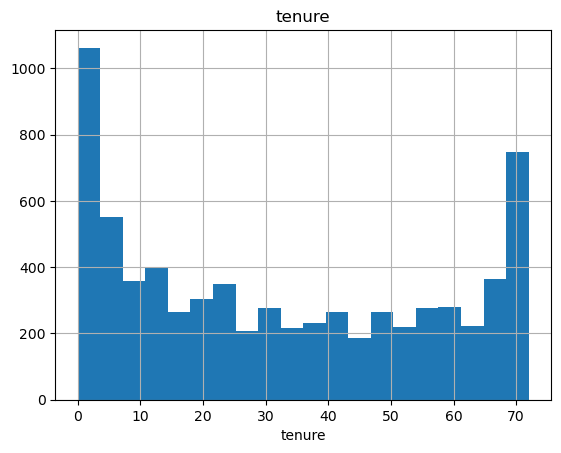

count   7043.00
mean      64.76
std       30.09
min       18.25
5%        19.65
10%       20.05
20%       25.05
30%       45.85
40%       58.83
50%       70.35
60%       79.10
70%       85.50
80%       94.25
90%      102.60
95%      107.40
99%      114.73
max      118.75
Name: MonthlyCharges, dtype: float64


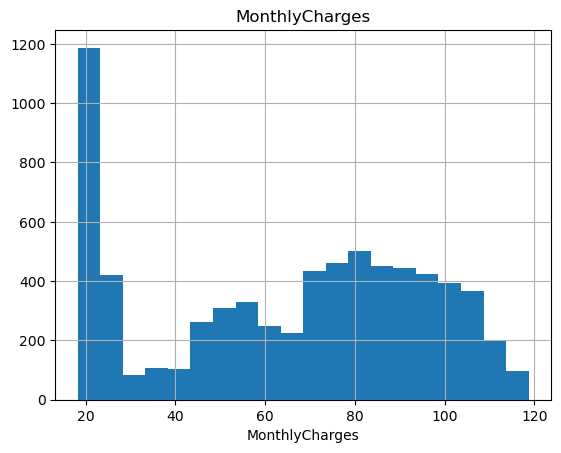

count   7043.00
mean    2279.73
std     2266.79
min        0.00
5%        48.60
10%       83.47
20%      265.32
30%      548.40
40%      939.78
50%     1394.55
60%     2043.71
70%     3132.75
80%     4471.44
90%     5973.69
95%     6921.02
99%     8039.26
max     8684.80
Name: TotalCharges, dtype: float64


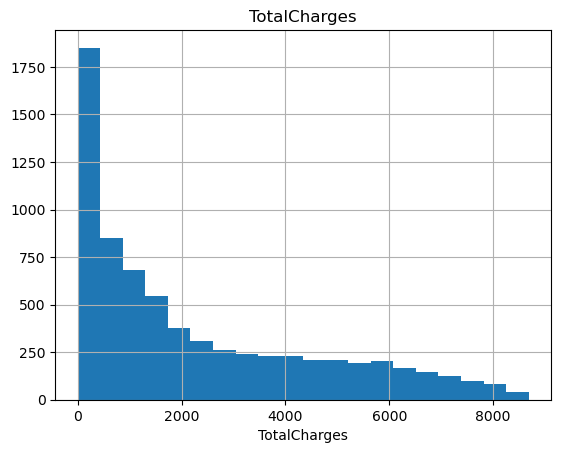

In [25]:
#Analyze numerical variables
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)
for col in num_cols:
    num_summary(df, col, plot=True)

# Analsis variable kategorik

        gender  Ratio
gender               
Male      3555  50.48
Female    3488  49.52
-------------------------------------------------


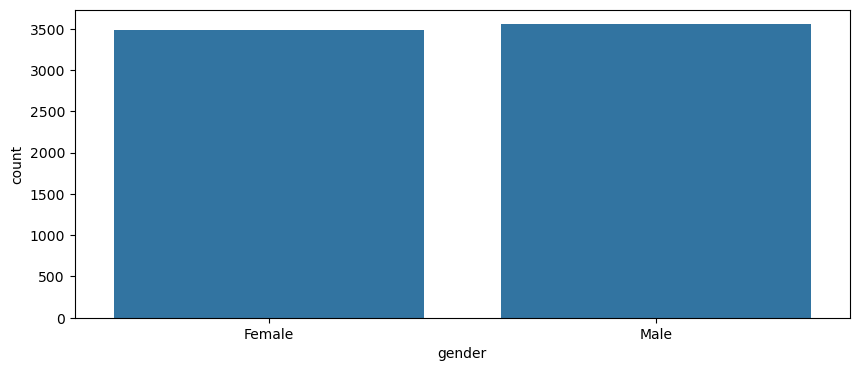

               SeniorCitizen  Ratio
SeniorCitizen                      
0                       5901  83.79
1                       1142  16.21
-------------------------------------------------


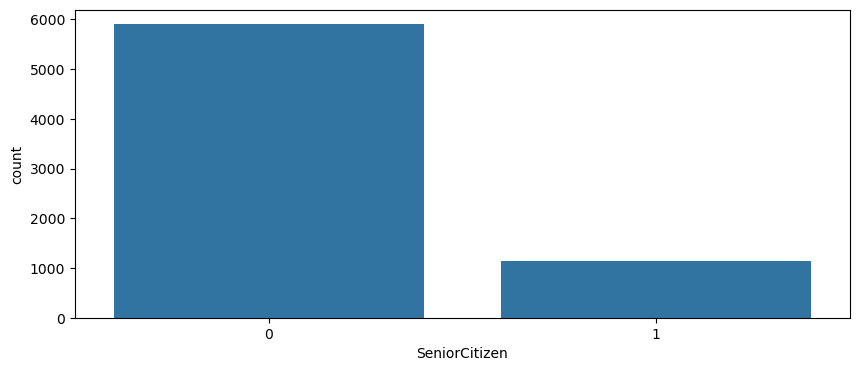

         Partner  Ratio
Partner                
No          3641  51.70
Yes         3402  48.30
-------------------------------------------------


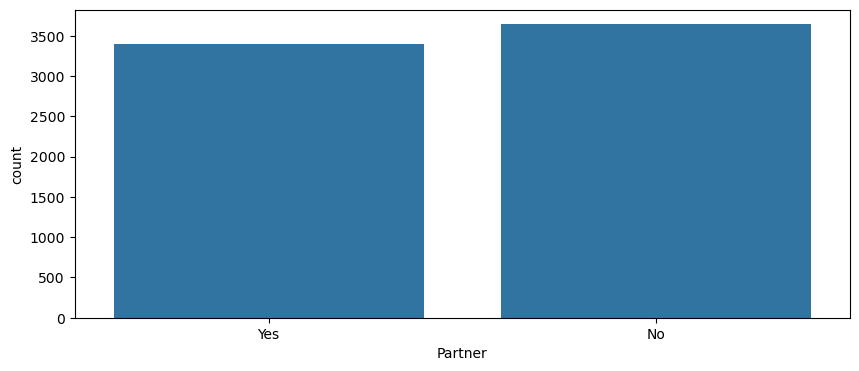

            Dependents  Ratio
Dependents                   
No                4933  70.04
Yes               2110  29.96
-------------------------------------------------


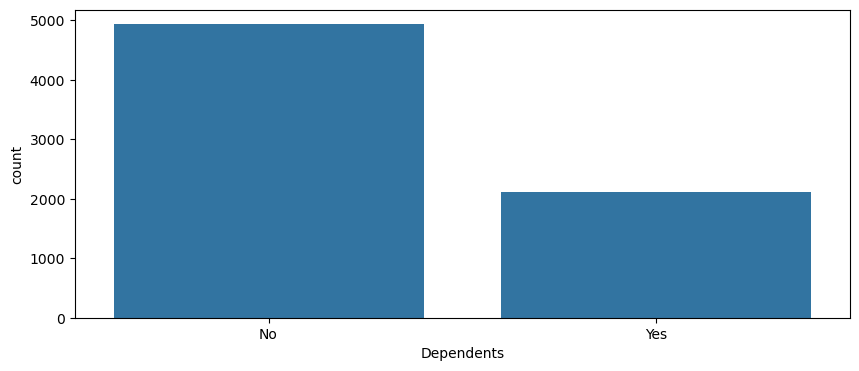

              PhoneService  Ratio
PhoneService                     
Yes                   6361  90.32
No                     682   9.68
-------------------------------------------------


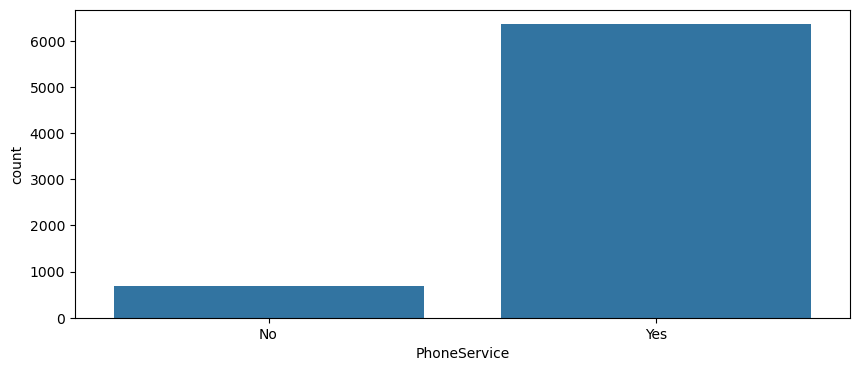

                  MultipleLines  Ratio
MultipleLines                         
No                         3390  48.13
Yes                        2971  42.18
No phone service            682   9.68
-------------------------------------------------


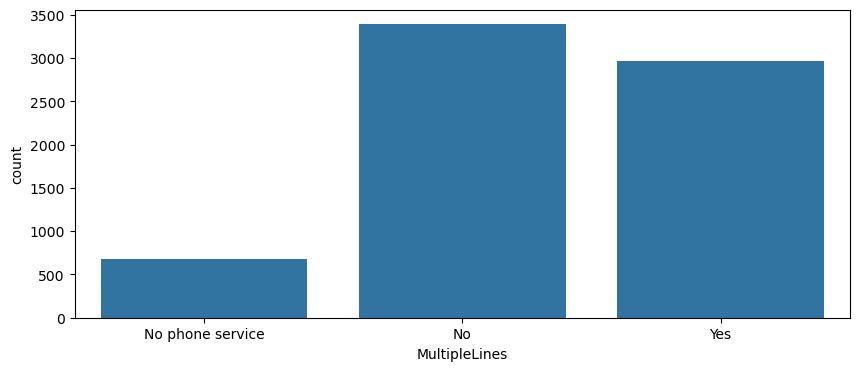

                 InternetService  Ratio
InternetService                        
Fiber optic                 3096  43.96
DSL                         2421  34.37
No                          1526  21.67
-------------------------------------------------


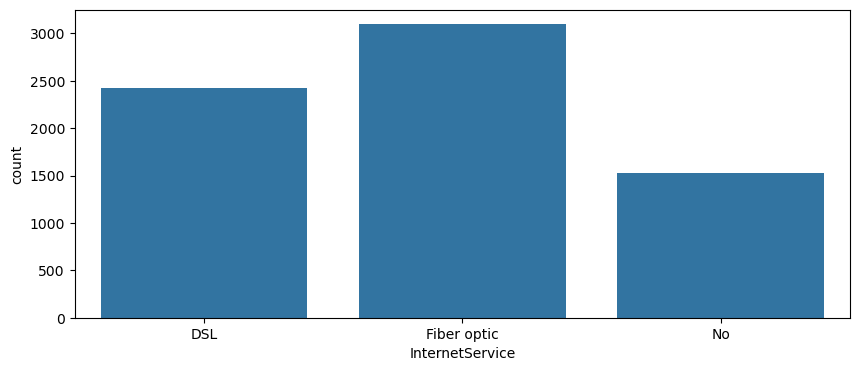

                     OnlineSecurity  Ratio
OnlineSecurity                            
No                             3498  49.67
Yes                            2019  28.67
No internet service            1526  21.67
-------------------------------------------------


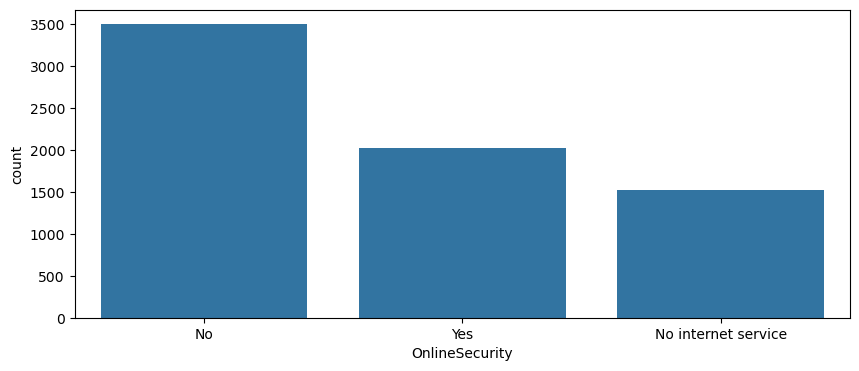

                     OnlineBackup  Ratio
OnlineBackup                            
No                           3088  43.84
Yes                          2429  34.49
No internet service          1526  21.67
-------------------------------------------------


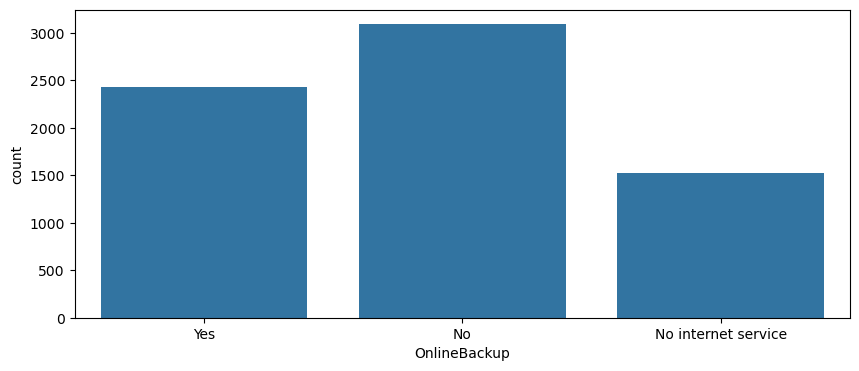

                     DeviceProtection  Ratio
DeviceProtection                            
No                               3095  43.94
Yes                              2422  34.39
No internet service              1526  21.67
-------------------------------------------------


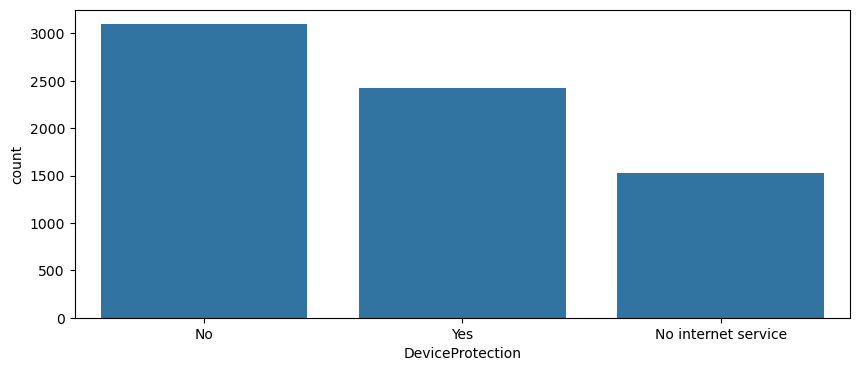

                     TechSupport  Ratio
TechSupport                            
No                          3473  49.31
Yes                         2044  29.02
No internet service         1526  21.67
-------------------------------------------------


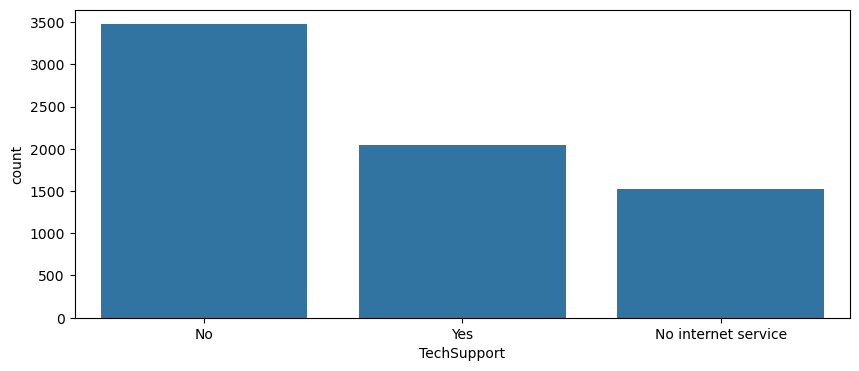

                     StreamingTV  Ratio
StreamingTV                            
No                          2810  39.90
Yes                         2707  38.44
No internet service         1526  21.67
-------------------------------------------------


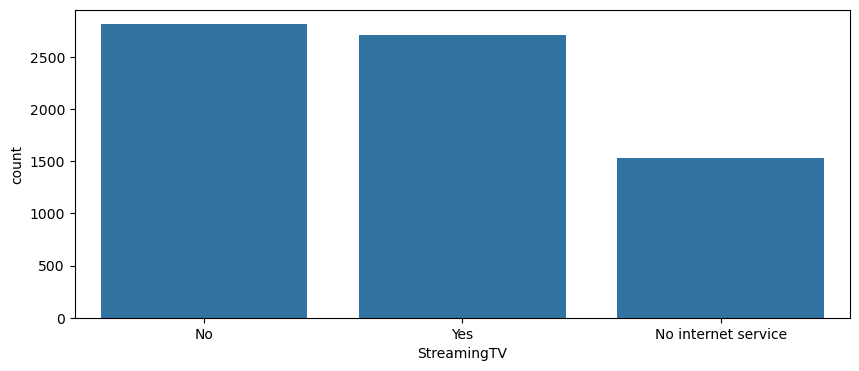

                     StreamingMovies  Ratio
StreamingMovies                            
No                              2785  39.54
Yes                             2732  38.79
No internet service             1526  21.67
-------------------------------------------------


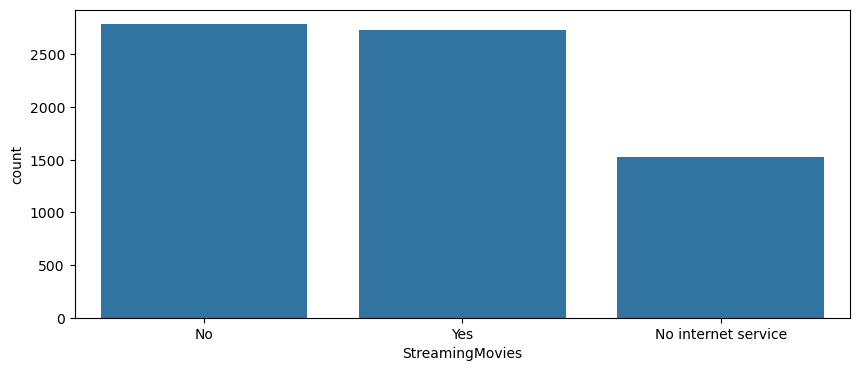

                Contract  Ratio
Contract                       
Month-to-month      3875  55.02
Two year            1695  24.07
One year            1473  20.91
-------------------------------------------------


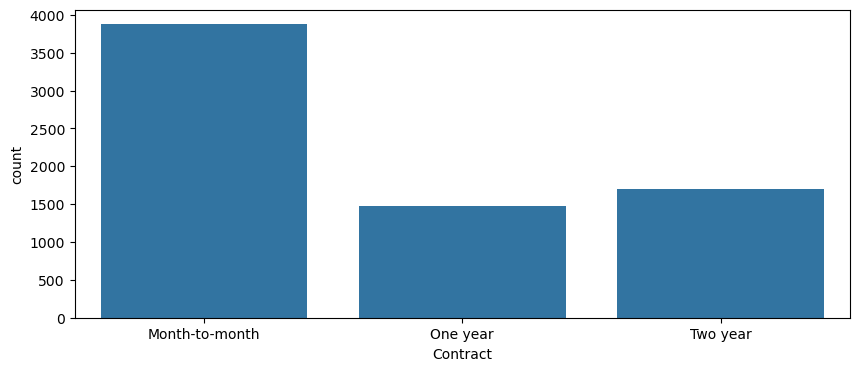

                  PaperlessBilling  Ratio
PaperlessBilling                         
Yes                           4171  59.22
No                            2872  40.78
-------------------------------------------------


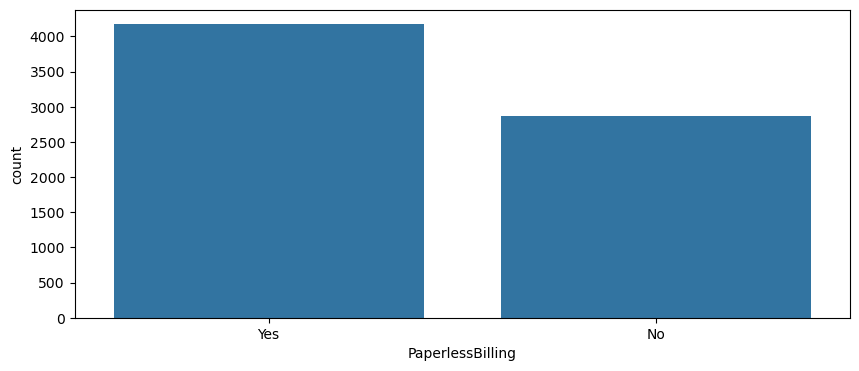

                           PaymentMethod  Ratio
PaymentMethod                                  
Electronic check                    2365  33.58
Mailed check                        1612  22.89
Bank transfer (automatic)           1544  21.92
Credit card (automatic)             1522  21.61
-------------------------------------------------


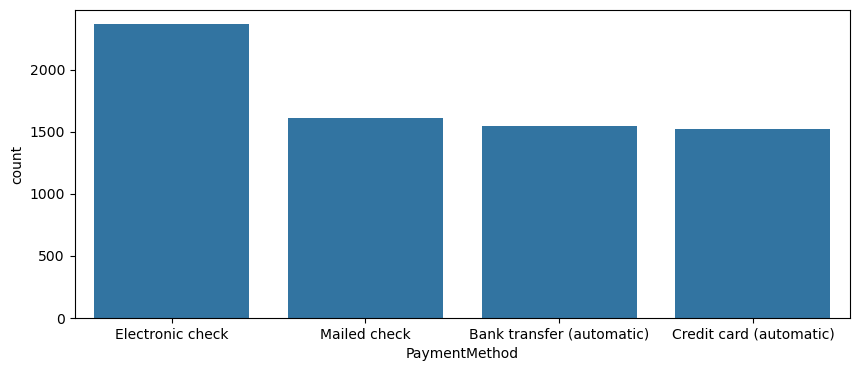

       Churn  Ratio
Churn              
0       5174  73.46
1       1869  26.54
-------------------------------------------------


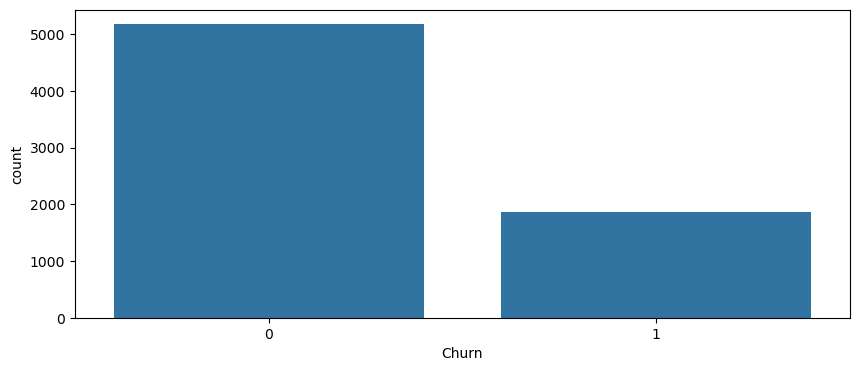

In [30]:
#Analyze categorical variables.
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print("-------------------------------------------------")

    if plot:
        plt.figure(figsize=(10, 4))
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)
for col in cat_cols:
    cat_summary(df, col, plot=True)

# Feature Engineering


# Correlation Analysis.

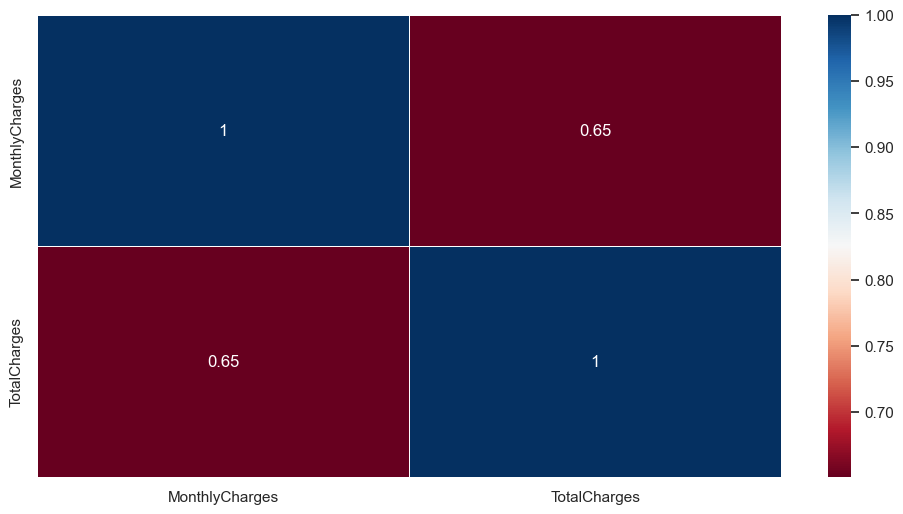

In [39]:
num_cols=[col for col in df.columns if df[col].dtype in ["int", "float"]]
corr = df[num_cols].corr() 
sns.set(rc={"figure.figsize": (12, 6)})
sns.heatmap(corr,annot=True, cmap="RdBu", linewidths=0.5)
plt.show()


# Model awal

In [40]:
dff = df.copy()
cat_cols = [col for col in cat_cols if col not in ["Churn"]]
cat_cols

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
dff = one_hot_encoder(dff, cat_cols, drop_first=True)

y = dff["Churn"]
X = dff.drop(["Churn","customerID"], axis=1)

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12345)


models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('DT', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345))]

for name, model in models:
    cv_results = cross_validate(model, X, y, cv=10, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])
    print(f"########## {name} ##########")
    print(f"Accuracy: {round(cv_results['test_accuracy'].mean(), 4)}")
    print(f"Auc: {round(cv_results['test_roc_auc'].mean(), 4)}")
    print(f"Recall: {round(cv_results['test_recall'].mean(), 4)}")
    print(f"Precision: {round(cv_results['test_precision'].mean(), 4)}")
    print(f"F1: {round(cv_results['test_f1'].mean(), 4)}")

########## LR ##########
Accuracy: 0.8045
Auc: 0.8427
Recall: 0.5426
Precision: 0.6602
F1: 0.5953
########## KNN ##########
Accuracy: 0.7636
Auc: 0.7468
Recall: 0.4468
Precision: 0.5706
F1: 0.5006
########## DT ##########
Accuracy: 0.7282
Auc: 0.6602
Recall: 0.5088
Precision: 0.4884
F1: 0.4981
########## RF ##########
Accuracy: 0.7974
Auc: 0.8257
Recall: 0.4939
Precision: 0.6581
F1: 0.564
########## XGB ##########
Accuracy: 0.7856
Auc: 0.8248
Recall: 0.519
Precision: 0.6157
F1: 0.5627


In [41]:
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,34,56.95,1889.50,True,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,2,53.85,108.15,True,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,45,42.30,1840.75,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,2,70.70,151.65,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


In [42]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Churn, dtype: int64

# Feature Extraction

In [43]:
# buat feature baru
# contract length
df['Contract_Monthly'] = (df['Contract'] == 'Month-to-month').astype(int)
df['Contract_OneYear'] = (df['Contract'] == 'One year').astype(int)
df['Contract_TwoYear'] = (df['Contract'] == 'Two year').astype(int)

# tenure
df['Tenure_0_6'] = (df['tenure'] <= 6).astype(int)  # 0 sampai 6 bulan
df['Tenure_6_24'] = ((df['tenure'] > 6) & (df['tenure'] <= 24)).astype(int)  # 6 - 24 bulan
df['Tenure_24Plus'] = (df['tenure'] > 24).astype(int)  # lebih dari 2 tahun

# payment method(automatic vs manual payments)
df['AutoPayment'] = df['PaymentMethod'].apply(lambda x: 1 if 'automatic' in x.lower() else 0)

# buat rata-rata pengeluaran perbulan
df['AvgMonthlySpend'] = df['TotalCharges'] / (df['tenure'] + 1) 

In [44]:
cat_cols, num_cols, cat_but_car = grab_col_names(df)

Observations: 7043
Variables: 29
cat_cols: 24
num_cols: 4
cat_but_car: 1
num_but_cat: 8


In [45]:
cat_cols

['gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn',
 'Contract_Monthly',
 'Contract_OneYear',
 'Contract_TwoYear',
 'Tenure_0_6',
 'Tenure_6_24',
 'Tenure_24Plus',
 'AutoPayment']

In [46]:
num_cols

['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlySpend']

# ENCODING

In [47]:
# LABEL ENCODING
def label_encoder(dataframe, binary_col):
    labelencoder = LabelEncoder()
    dataframe[binary_col] = labelencoder.fit_transform(dataframe[binary_col])
    return dataframe

binary_cols = [col for col in df.columns if df[col].dtypes == "O" and df[col].nunique() == 2]
binary_cols

for col in binary_cols:
    df = label_encoder(df, col)

# One-Hot Encoding
# cat_cols
cat_cols = [col for col in cat_cols if col not in binary_cols and col not in ["Churn", "NEW_TotalServices"]]
cat_cols

def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe

df = one_hot_encoder(df, cat_cols, drop_first=True)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,AvgMonthlySpend,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Monthly_1,Contract_OneYear_1,Contract_TwoYear_1,Tenure_0_6_1,Tenure_6_24_1,Tenure_24Plus_1,AutoPayment_1
0,7590-VHVEG,0,0,1,0,1,0,1,29.85,29.85,0,14.93,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False
1,5575-GNVDE,1,0,0,0,34,1,0,56.95,1889.50,0,53.99,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False
2,3668-QPYBK,1,0,0,0,2,1,1,53.85,108.15,1,36.05,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False
3,7795-CFOCW,1,0,0,0,45,0,0,42.30,1840.75,0,40.02,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,True
4,9237-HQITU,0,0,0,0,2,1,1,70.70,151.65,1,50.55,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False


# Standardization

In [48]:
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

In [49]:
df.shape

(7043, 40)

In [51]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,AvgMonthlySpend,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Monthly_1,Contract_OneYear_1,Contract_TwoYear_1,Tenure_0_6_1,Tenure_6_24_1,Tenure_24Plus_1,AutoPayment_1
0,7590-VHVEG,0,0,1,0,0.01,0,1,0.12,0.00,0,0.13,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,True,False,False,False
1,5575-GNVDE,1,0,0,0,0.47,1,0,0.39,0.22,0,0.45,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,True,False,True,False,False,False,True,False
2,3668-QPYBK,1,0,0,0,0.03,1,1,0.35,0.01,1,0.30,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False,True,False,False,False


# Creating a Model

In [52]:
#Create Model

dfff=df.copy()
y = dfff["Churn"]
X = dfff.drop(["Churn","customerID"], axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


models = [('LR', LogisticRegression(random_state=12345)),
          ('KNN', KNeighborsClassifier()),
          ('DT', DecisionTreeClassifier(random_state=12345)),
          ('RF', RandomForestClassifier(random_state=12345)),
          ('XGB', XGBClassifier(random_state=12345))]

last_models_metrics = []


for name, model in models:
    cv_results = cross_validate(model, X, y, cv=5, scoring=["accuracy", "f1", "roc_auc", "precision", "recall"])

    accuracy = round(cv_results['test_accuracy'].mean(), 4)
    auc = round(cv_results['test_roc_auc'].mean(), 4)
    recall = round(cv_results['test_recall'].mean(), 4)
    precision = round(cv_results['test_precision'].mean(), 4)
    f1 = round(cv_results['test_f1'].mean(), 4)

    last_models_metrics.append({
        "Model": name,
        "Accuracy": accuracy,
        "AUC": auc,
        "Recall": recall,
        "Precision": precision,
        "F1": f1
    })

    print(f"########## {name} ##########")
    print(f"Accuracy: {accuracy}")
    print(f"AUC: {auc}")
    print(f"Recall: {recall}")
    print(f"Precision: {precision}")
    print(f"F1: {f1}")


########## LR ##########
Accuracy: 0.8066
AUC: 0.8487
Recall: 0.5238
Precision: 0.6749
F1: 0.5898
########## KNN ##########
Accuracy: 0.7721
AUC: 0.7793
Recall: 0.5142
Precision: 0.5801
F1: 0.5451
########## DT ##########
Accuracy: 0.7251
AUC: 0.6514
Recall: 0.4912
Precision: 0.4826
F1: 0.4867
########## RF ##########
Accuracy: 0.7876
AUC: 0.824
Recall: 0.4901
Precision: 0.6288
F1: 0.5506
########## XGB ##########
Accuracy: 0.7862
AUC: 0.8222
Recall: 0.5265
Precision: 0.6131
F1: 0.5664


# Comparison of Metrics for Different Models After Feature Engineering

In [55]:
import plotly.graph_objects as go

# Dictionary containing the updated metric results
metrics = {
    "Model": ["LR", "KNN", "DT", "RF", "XGB"],
    "Accuracy": [last_models_metrics[0]['Accuracy'], last_models_metrics[1]['Accuracy'],
                 last_models_metrics[2]['Accuracy'], last_models_metrics[3]['Accuracy'],
                 last_models_metrics[4]['Accuracy']],
    "AUC": [last_models_metrics[0]['AUC'], last_models_metrics[1]['AUC'],
            last_models_metrics[2]['AUC'], last_models_metrics[3]['AUC'],
            last_models_metrics[4]['AUC']],
    "Recall": [last_models_metrics[0]['Recall'], last_models_metrics[1]['Recall'],
               last_models_metrics[2]['Recall'], last_models_metrics[3]['Recall'],
               last_models_metrics[4]['Recall']],
    "Precision": [last_models_metrics[0]['Precision'], last_models_metrics[1]['Precision'],
                  last_models_metrics[2]['Precision'], last_models_metrics[3]['Precision'],
                  last_models_metrics[4]['Precision']],
    "F1": [last_models_metrics[0]['F1'], last_models_metrics[1]['F1'],
           last_models_metrics[2]['F1'], last_models_metrics[3]['F1'],
           last_models_metrics[4]['F1']]
}

# Creating a DataFrame from the updated metrics dictionary
results_df = pd.DataFrame(metrics)

# Sorting the DataFrame by accuracy in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False)

# Creating the figure for the graph
fig = go.Figure()

# Colors for the metrics
colors = ["purple", "green", "blue", "orange", "red"]

# Adding traces for each metric in the specified order
for metric, color in zip(["Accuracy", "AUC", "Recall", "Precision", "F1"], colors):
    fig.add_trace(go.Bar(
        x=results_df["Model"],
        y=results_df[metric],
        marker_color=color,
        name=metric,
        text=results_df[metric],
        textposition='auto'
    ))

# Setting axis labels and title
fig.update_layout(
    xaxis_title="Model",
    yaxis_title="Metric Score",
    title="Comparison of Metrics for Different Models After Feature Engineering"
)

# Displaying the graph
fig.show(block=True)

# Feature Importance

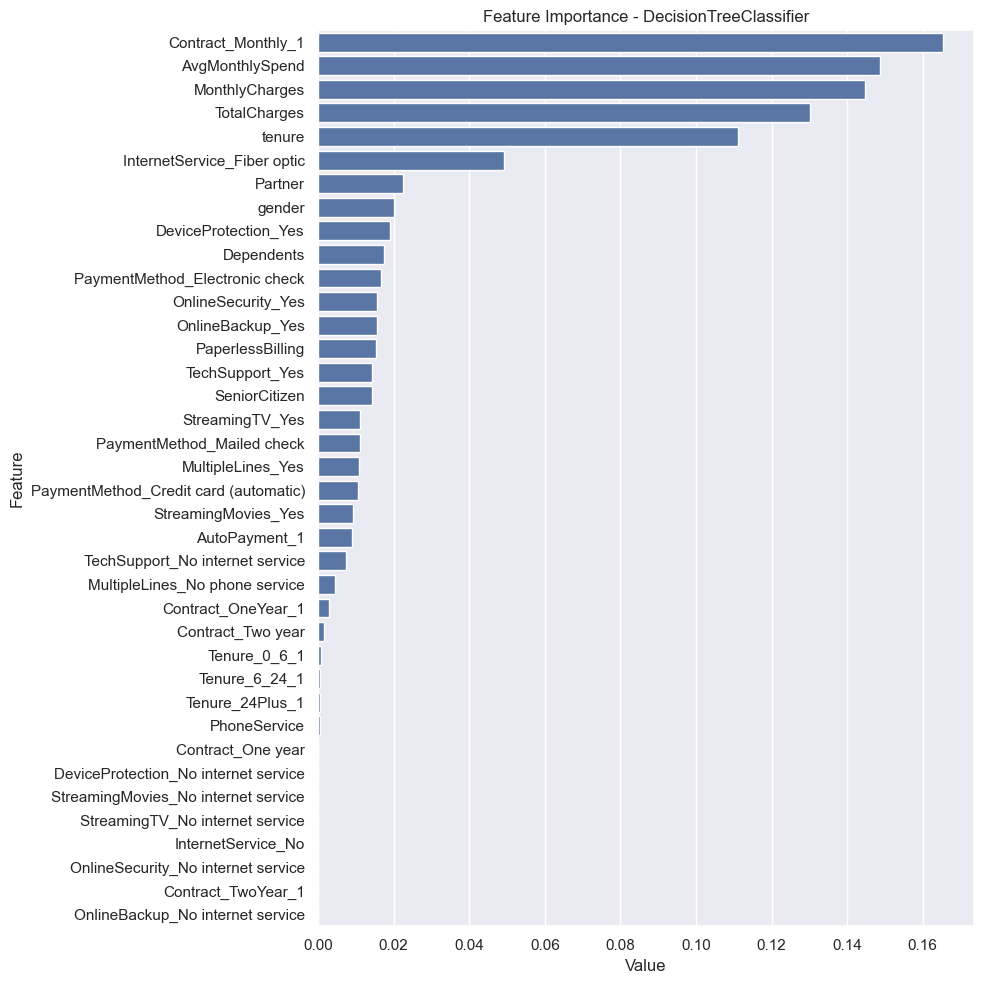

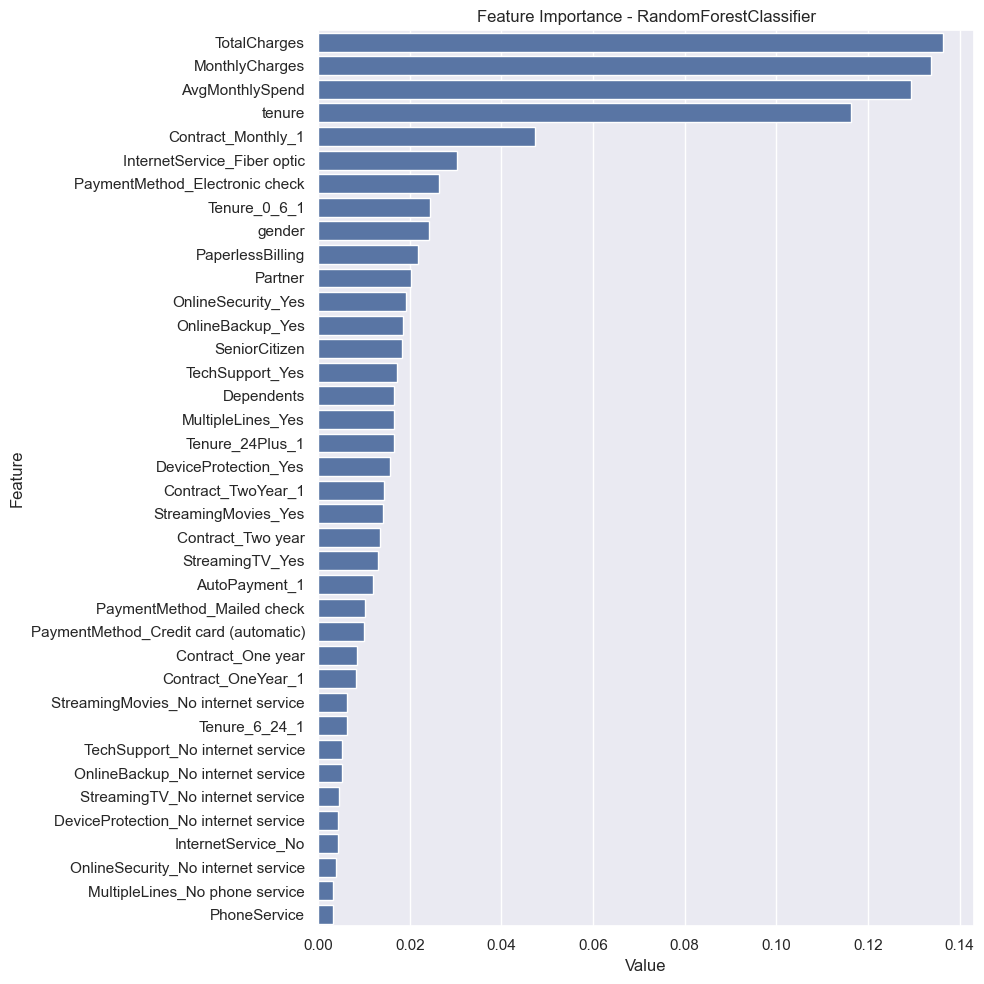

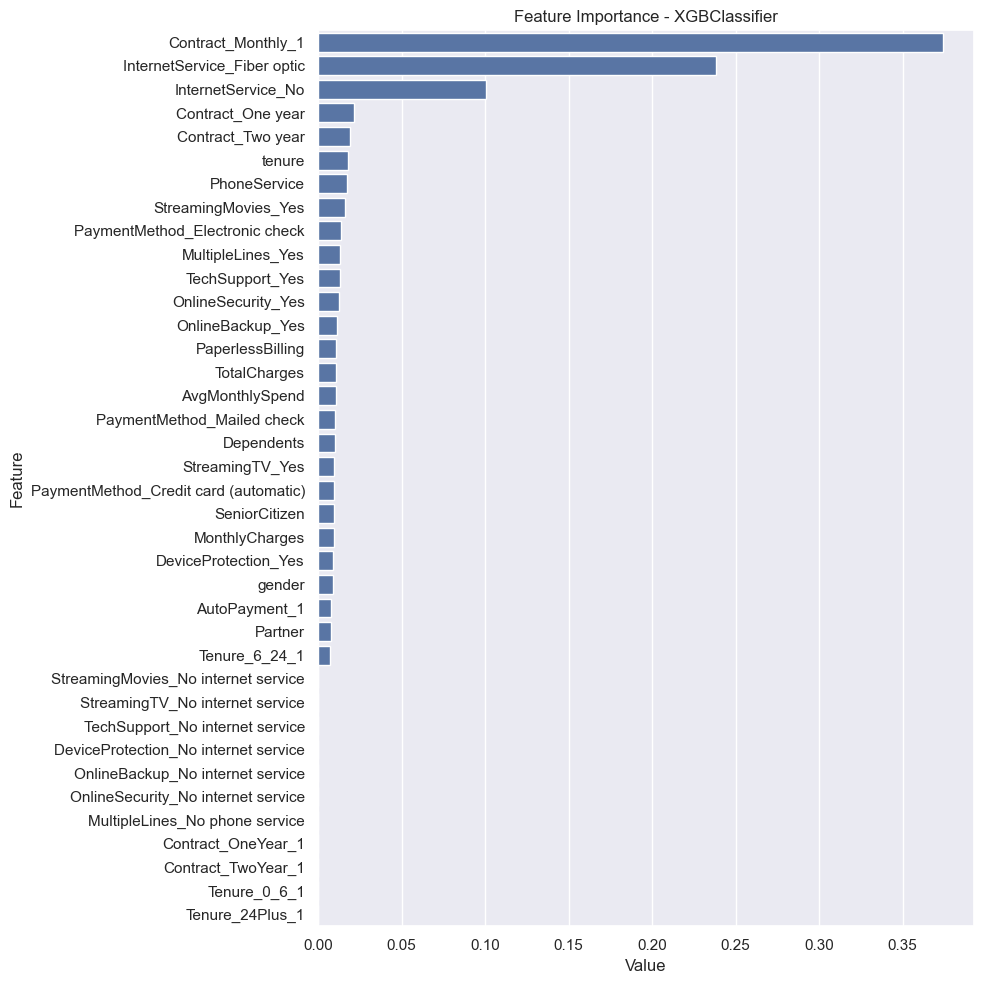

In [56]:
models = [DecisionTreeClassifier(random_state=12345),
         RandomForestClassifier(random_state=12345),
         XGBClassifier(random_state=12345)]

def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                      ascending=False)[0:num])
    plt.title(f'Feature Importance - {model.__class__.__name__}')
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig(f'importances_{model.__class__.__name__}.png')

for model in models:
    model.fit(X, y)
    plot_importance(model, X)

# Hyperparameter Optimization

In [58]:
lr_params = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
knn_params = {"n_neighbors": [3, 5, 7]}
dt_params = {"max_depth": [3, 5, 7]}
rf_params = {"n_estimators": [100, 300, 500]}
xgb_params = {"learning_rate": [0.01, 0.1], "max_depth": [3, 5, 7]}

classifiers = [
    ("LR", LogisticRegression(), lr_params),
    ("KNN", KNeighborsClassifier(), knn_params),
    ("DT", DecisionTreeClassifier(), dt_params),
    ("RF", RandomForestClassifier(), rf_params),
    ("XGB", XGBClassifier(), xgb_params)]

def hyperparameter_optimization(X, y, cv=5, scoring="accuracy"):
    print("Hyperparameter Optimization")
    best_models = {}
    for name, classifier, params in classifiers:
        print(f"########## {name} #########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")

        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X,y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After) : {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models, final_model

best_models, final_model = hyperparameter_optimization(X, y)

Hyperparameter Optimization
########## LR #########
accuracy (Before): 0.8066
accuracy (After) : 0.807
LR best params: {'C': 100}

########## KNN #########
accuracy (Before): 0.7721
accuracy (After) : 0.7737
KNN best params: {'n_neighbors': 7}

########## DT #########
accuracy (Before): 0.7287
accuracy (After) : 0.791
DT best params: {'max_depth': 5}

########## RF #########
accuracy (Before): 0.7892
accuracy (After) : 0.7899
RF best params: {'n_estimators': 300}

########## XGB #########
accuracy (Before): 0.7862
accuracy (After) : 0.8028
XGB best params: {'learning_rate': 0.1, 'max_depth': 3}



In [59]:
final_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

# Final Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    stratify=y,
    random_state=12345
)

# We are retraining the final model with the training data 
final_model.fit(X_train, y_train)

# Predictions on the test set
y_final_pred = final_model.predict(X_test)
y_proba = final_model.predict_proba(X_test)[:, 1]  # Positive Class Probabilities

# Roc Curve and Confusion Matrix

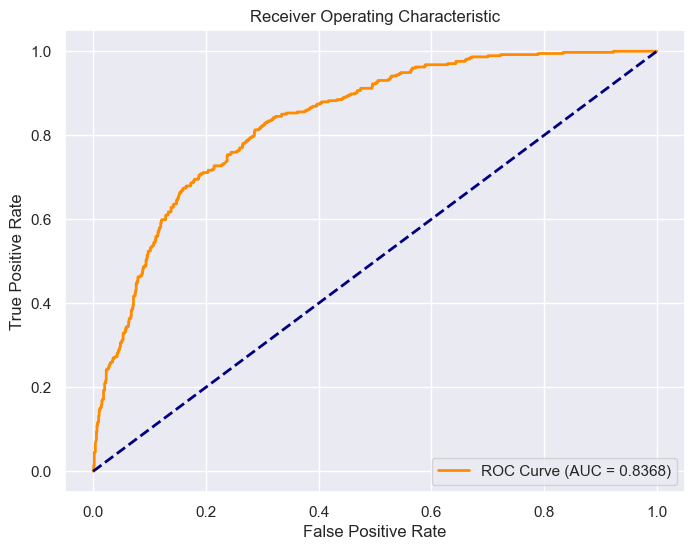

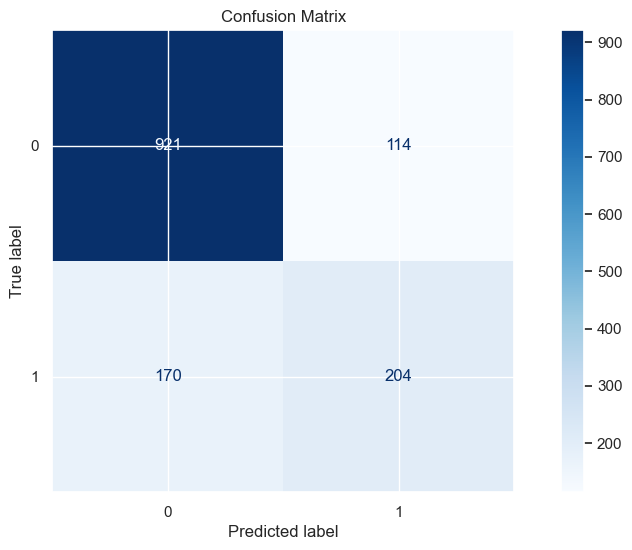

Final Model Performance on Test Set
-------------------------------------
Accuracy : 0.7984
Recall   : 0.5455
Precision: 0.6415
F1 Score : 0.5896
AUC      : 0.8368


In [64]:
# Calculations for the ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = calc_auc(fpr, tpr)

# Plotting the ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color="darkorange", lw=2, label="ROC Curve (AUC = %0.4f)" % roc_auc)
plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

# Computing and Plotting the Confusion Matrix
cm = confusion_matrix(y_test, y_final_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=final_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

# Calculating Performance Metrics
accuracy = accuracy_score(y_test, y_final_pred)
recall = recall_score(y_test, y_final_pred)
precision = precision_score(y_test, y_final_pred)
f1 = f1_score(y_test, y_final_pred)
auc_score = roc_auc_score(y_test, y_proba)

print("Final Model Performance on Test Set")
print("-------------------------------------")
print(f"Accuracy : {accuracy:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score : {f1:.4f}")
print(f"AUC      : {auc_score:.4f}")